In [1]:
%pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_surface_from_array(Z, cmap='gray'):
    """
    Plots a 2D numpy array as a surface plot.
    
    Parameters:
    - Z: 2D numpy array containing the Z values.
    - cmap: Colormap to use for the surface.
    - title: Title for the plot.
    """
    
    # Create a meshgrid for X and Y based on the shape of Z
    x = np.linspace(0, Z.shape[1]-1, Z.shape[1])
    y = np.linspace(0, Z.shape[0]-1, Z.shape[0])
    X, Y = np.meshgrid(x, y)
    
    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Hide axes ticks
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.set_zticks([])
    
    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cmap)
    
    plt.show()

In [5]:
%cd /home/jovyan/work/tf-docker-data//TesisCode/TerrainSGAN/

/home/jovyan/work/tf-docker-data/TesisCode/TerrainSGAN


In [6]:
import tensorflow as tf
from Generator import generator

generator.load_weights('generator_2023-11-28T03_55_31_841989.keras')

2023-11-28 03:56:56.875960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 03:56:56.910344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 03:56:56.910496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 03:56:56.911216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/1 [==============================] - 0s 16ms/step


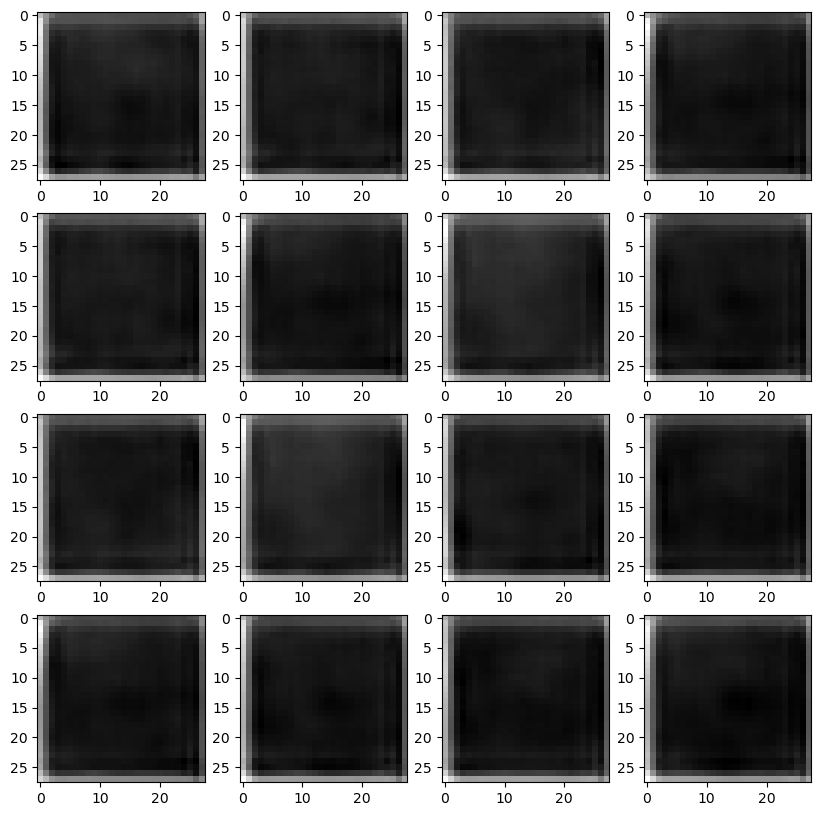

In [8]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1], cmap='gray')

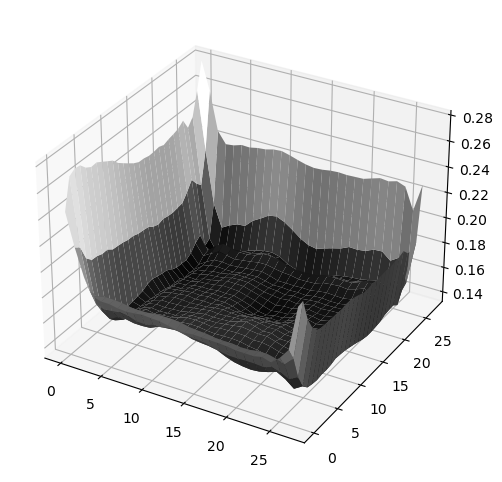

In [10]:
sample = np.reshape(imgs[0], (28, 28))
plot_surface_from_array(sample)